# Inteligencia Artificial Aplicada al Análisis de Datos Biológicos

__Análisis de datos de expresión con algoritmos no supervisados__

_MeIA_

`2025`

## Algoritmos No-Supervisados


- Reducción de dimensionalidad
  - Proyección lineal
    - Análisis de componentes principales
    - Descomposición de valores singulares
    - Proyección aleatorias

  - Aprendizaje múltiple
    - Isomap
    - t-distributed stochastic neighbor embedding
    - NMF
    - Análisis de componentes independientes
   

- Clustering
  - K-means
  - Cluster jerárquico
  - DBSCAN

- Extracción de características
  - Autoencoders

- Biclustering



# Reducción de dimensiones

La reducción de dimensiones es una herramienta muy utilizada a la hora de utilizar algoritmos inteligentes para procesar datos de $n$ dimensiones.

En general, a medida que se aumenta el tamaño del set de datos (ya sea porque se agregan features o porque se tienen más muestras) utilizado para entrenar un algoritmo, se requieren más recursos para poder procesarlos incluyendo memoria RAM, CPU y espacio de disco para almacenar el set.

En determinadas ocaciones también puede ocurrir que se agregan más features a un set de datos que no aportan información y en consecuencia no tiene sentido utilizar dichos features para entrenar un algoritmo.

La reducción de dimensiones se encarga de buscar una representación más compacta de un set de datos no solo para optimizar el uso de recursos sino también para otros usos: visualización de datos, comrpesión de imágenes, feature engineering, etc.

El número de caracteristicas en un conjunto de datos es conocido como su dimensión, por lo tanto si el número de características aumenta, el número de dimensiones también incrementa.

![picture](https://drive.google.com/uc?id=10Srm48VG9j3yNRp6-ulIc54QutbwUh_Z)

Datos de paciente con cancer (1000 filas y 25 columnas)

De manera que estos datos de alta dimensión pueden plantear varios desafíos, como los siguientes:

- Aumento en el costo computacional
- Visualización de datos de alta dimensión
- Redundancia de datos, de manera que es necesario conservar los datos con mayor varianza y con la información más relevante

### Maldición de la dimensionalidad

![picture](https://drive.google.com/uc?id=1hCb4yzAhtiQoflupGtc2L4TOKlZbG3yf)

![picture](https://drive.google.com/uc?id=1BJ_saAobE1Q18KzlaGnsT6kT21LwzMH2)

Richard E. Bellman

La reducción de la dimensionalidad consiste en disminuir el número de dimensiones en un espacio de características

![picture](https://drive.google.com/uc?id=1hHzYfetOqpEmzhhnAYpxohRO8uNos5nm)

### Importancia de la reducción de dimensionalidad

- Remover las caracteristicas redundantes
- Menos poder de cómputo durante el entrenamiento
- Es posible reducir el sobreajuste
- Mejora el rendimiento
- Nos ayuda a reducir el espacio de almacenamiento

### Importancia de la reducción de dimensionalidad

- Remover las caracteristicas redundantes
- Menos poder de cómputo durante el entrenamiento
- Es posible reducir el sobreajuste
- Mejora el rendimiento
- Nos ayuda a reducir el espacio de almacenamiento

### Descomposición en valores propios de una matriz

Una matriz $A$ de tamaño $nxn$ se puede descomponer en un conjunto de valores propios (eigenvectores) (x) y valores propios (eigenvalores) ($\lambda$) de manera que:
$$(A-λ I)=0$$
Se llaman eigenvalores o valores propios.

La solución $x$ que satisface:
$$(A-λ I)x=0$$

se llama eigenvectores o vectores propios.



Existen diferentes metodos para realizar una descomposición en eigenvectores y en eigenvalores.

- Método de potencias
- SVD, Descomposición de Valores Singulares

## Singular Values Descomposition

![picture](https://drive.google.com/uc?id=1WgMONjoiJy-dDKnvkpB-_-ra-dBgwhuy)

Dada una matriz $A$ de tamaño $mxn$, la descomposición de valores singulares es de la forma

$$A=UΣV^T$$
Donde:

- $U$ es una matriz ortogonal de tamaño $mxm$, cuyas columnas son los vectores singulares izquierdos de $A$.
- $Σ$ es una matriz diagonal de tamaño $mxn$, con elementos no negativos, conocidos como valores singulares de $A$.
- $V^T$ es la transpuesta de la matriz ortogonal $V$, de tamaño $nxn$, cuyas columnas son los vectores singulares derechos de $A$.


### Aplicaciones
- Reducción de dimensiones
- Compresión de imágenes
- Compresión de videos
- Reconstrucción de imagenes
- Reconstrucción de sistemas
- Procesamiento de señales
- Procesamiento de texto y lenguaje natural

1) Descomposición de valores singulares de la matriz A

Dada una matriz A calcular su descomposición en valores singulares y posteriormente reconstruirla.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Carga de bibliotecas de numpy y scipy
from numpy import array
from scipy.linalg import svd
#Definimos la matriz A
A = array([[5,1],[2,-2],[4,9]])
print(A)

[[ 5  1]
 [ 2 -2]
 [ 4  9]]


In [ ]:
#Descomposición de la matriz A
U, Sigma, VT = svd(A)
print("Matriz U:\n",U) #Matriz ortogonal U
print("Matriz Sigma: \n",Sigma) #Valores singulares
print("Matriz VT:\n",VT) #Matriz ortogonal VT

Matriz U:
 [[ 0.32743953  0.78898129 -0.51989603]
 [-0.06818241  0.56852442  0.81983605]
 [ 0.94240889 -0.23299896  0.23995201]]
Matriz Sigma: 
 [10.38265511  4.81668691]
Matriz VT:
 [[ 0.50762241  0.86157965]
 [ 0.86157965 -0.50762241]]


# Principal Component Analysis

Dada una serie de datos compuestos por $n$ observaciones y $m$ características, los cuales hacemos pasar por una caja negra que en principio no sabemos que contiene y esta nos devuelve $n$ observaciones con $k$ características nuevas.

$$
A\in \Re ^{nxm} \rightarrow \mbox{ \mancube} \rightarrow A' \in \Re^{nxk}
$$

$(k<m)$

Dependiendo del algoritmo en mancube podemos obtener un conjunto diferente, esto depende de la función que optimice o priorice el algoritmo utilizado.

- PCA es una técnica de reducción de dimensiones

---

inventada por Karl Pearson en 1901.
- El algoritmo busca encontrar el espacio PCA, el cual representa la dirección de la varianza máxima de los datos.
- El espacio PCA consiste de componentes proncipales ortogonales, es decir ejes y vectores.

#### Definición de PCA

![picture](https://drive.google.com/uc?id=1doA8hNfRDZPH7BozLEjO5Xp6XZ9HdvdD)

### Procesamiento por SVD
- Centramos los datos
- Realizamos la descomposición SVD
  - $U$ es la matriz de vectores propios izquierdos
  - $Σ$ es la matriz con los vectores singulares (Raíces cuadradas de los valores propios de V)
  - $V^T$ es la matriz de vectores propios derechos
- Ordenamos los componentes pincipales. Es decir, los valores singulares de $Σ$ de mayor a menos
- Seleccionamos los componentes principales
- Calculamos los vectores propios de los componentes principales.

In [ ]:
#También podemos definir una clase para PCA basada en SVD
class PCASVD:
  def __init__(self, n_components):
    self.n_components_ = n_components

  def fit(self, X):
    self.means_ = X.mean(axis=0) #Calcula las medias de las caracteristicas
    X -= self.means_ #Centramos los datos

    U, S, V = np.linalg.svd(X) #Calculamos la Singular Value Descomposition
    self.vars_ = S[:self.n_components_]**2 / (X.shape[0] - 1) #Almacenar variaciones explicadas por componentes principales
    self.components_ = V[:self.n_components_].T #Almacena los componentes principales seleccionados

  #Transforma los datos proyectandolos en PC
  def transform(self, X):
    return (X - self.means_) @ self.components_

  #Trnasformación inversa de los datos para proyectarlos en el espacio original
  def inverse_transform(self, X_reduced):
    return X_reduced @ self.components_.T + self.means_

In [ ]:
#Podemos definir una clase para PCA basado en la matriz de covarianza
class PCA:
  #Inicia PCA con un numero de componentes
  def __init__(self, n_components):
    self.n_components_ = n_components

  #Ajusta el modelo en los datos para obtener:
  def fit(self, X):
    self.means_ = X.mean(axis=0) #Calcula la media de cada caracteristica
    devs = X - self.means_ #Centramos los datos restando la media

    cov = (devs.T @ devs) / (X.shape[0] - 1) #Calcula la matriz de covarianza
    l, u = np.linalg.eig(cov) #Calcula los eigenvalores y eigenvectores

    lts = l.argsort()[::-1] #Ordena los eigenvalores de forma desendente
    u = u[:, lts] #Ordena los eigenvectores de acuerdo a sus eigenvalores
    l = l[lts]

    self.components_ = u[:, :self.n_components_] #Almacena los componentes principales seleccionados
    self.vars_ = l[:self.n_components_] #Almacenamos la varianza explicada por cada componentes principales

  #Transforma los datos proyectandolos en PC
  def transform(self, X):
    return (X - self.means_) @ self.components_ #Prpyectamos los datos en los componentes principales

  #Trnasformación inversa de los datos para proyectarlos en el espacio original
  def inverse_transform(self, X_reduced):
    return X_reduced @ self.components_.T + self.means_ #Reconstruimos los datos en el espacio original

## Conjunto de datos de Iris
Apliquemos el PCA que acabamos de programar en conjunto de datos de flores iris. Elegimos los atributos de ancho y largo sepal y visualizamos el conjunto.

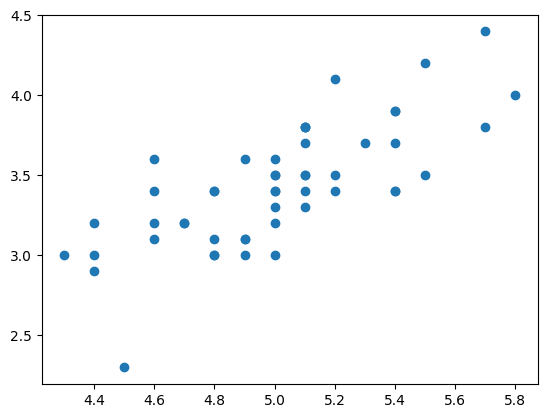

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris() #Lee el dataset de iris
p2d = iris['data'][:,:2] #Seleccionamos solo las 2 primera caracteristicas
p2d = p2d[iris['target']==0] #Filtra las muestras con etiqueta 0
plt.plot(p2d[:, 0], p2d[:, 1], 'o') #Grafica los puntos en 2D
plt.show()

Encontramos sus 2 componentes principales

In [ ]:
pca2d = PCA(2) #Crea un modelo de PCA para 2 componentes
pca2d.fit(p2d) #Corremos el modelo PCA en los datos de 2D

Visualizamos los componentes principales encontrados

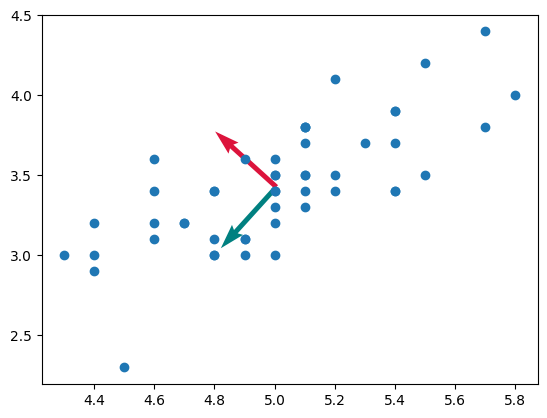

In [ ]:
# Graficamos los componentes principales
plt.plot(p2d[:, 0], p2d[:, 1], 'o') #Graficamos el dataset 2D original
colors = ['teal', 'crimson']
for c,u in zip(colors, pca2d.components_):
  #Encontramos el centro y trazamos una flecha que representa cada dirección de cada PC
  means = p2d.mean(axis=0)
  plt.quiver(means[0], means[1], u[0], u[1], width=0.01,
             scale=6,
             color=c)
plt.show()

Desplegamos sus valores.

In [ ]:
print(pca2d.components_) #Componentes principales
print(pca2d.vars_) #Las variaciones explicadas por cada CP

[[-0.67174957 -0.74077832]
 [-0.74077832  0.67174957]]
[0.23366074 0.03427804]


Hacemos los mismo con la implementación de PCA por SVD.

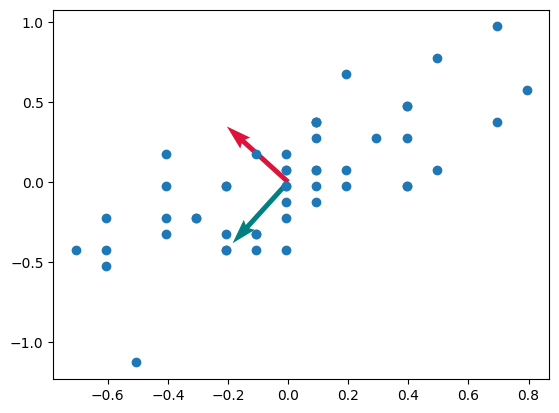

In [ ]:
pca2dsvd = PCASVD(2) # Creamos el modelo con SVD
pca2dsvd.fit(p2d) #Realizamos el modelo con los datos "D"
plt.plot(p2d[:, 0], p2d[:, 1], 'o')
colors = ['teal', 'crimson']
for c,u,v in zip(colors, pca2dsvd.components_, pca2dsvd.vars_):
  means = p2d.mean(axis=0)
  plt.quiver(means[0], means[1], u[0], u[1], width=0.01, scale=6, color=c)
plt.show()

In [ ]:
print(pca2dsvd.components_)
print(pca2dsvd.vars_)

[[-0.67174957 -0.74077832]
 [-0.74077832  0.67174957]]
[0.23366074 0.03427804]


Reducimos dimensiones del conjunto de ejemplos de 3 (ancho y largo del sépalo y ancho del pétalo).

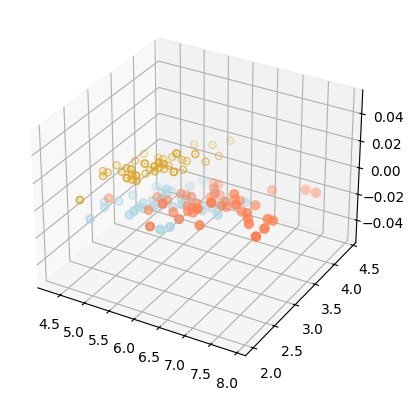

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p3d = iris['data'][:, :3] #Tomamos un subconjunto de 3D

colores=['goldenrod', 'lightblue', 'coral']
for i,c in enumerate(colores):
  plt.scatter(p3d[iris['target']==i,0], p3d[iris['target']==i, 1], p3d[iris['target']==i, 2], lw=5, color=c) #Lo graficamos de acuerdo a cada uno de las especies de flores

In [ ]:
#Comparación entre PCA con la matriz de covarianza, SVD y la implementación PCA de sklearn
pca3d_2c = PCA(2)
pca3d_2c.fit(p3d)
print(pca3d_2c.components_)
print(pca3d_2c.vars_)

pcasvd3d_2c = PCASVD(2)
pcasvd3d_2c.fit(p3d)
print(pcasvd3d_2c.components_)
print(pcasvd3d_2c.vars_)

from sklearn.decomposition import PCA as SKPCA
skpca = SKPCA(n_components=2, whiten=False)
skpca.fit(p3d)
print(skpca.components_)
print(skpca.explained_variance_)

[[-0.38983343  0.63922328]
 [ 0.09100801  0.74305866]
 [-0.91637735 -0.19813487]]
[3.69111979 0.24137727]
[[ 0.38983343 -0.63922328]
 [-0.09100801 -0.74305866]
 [ 0.91637735  0.19813487]]
[3.69111979 0.24137727]
[[ 0.38983343 -0.09100801  0.91637735]
 [ 0.63922328  0.74305866 -0.19813487]]
[3.69111979 0.24137727]


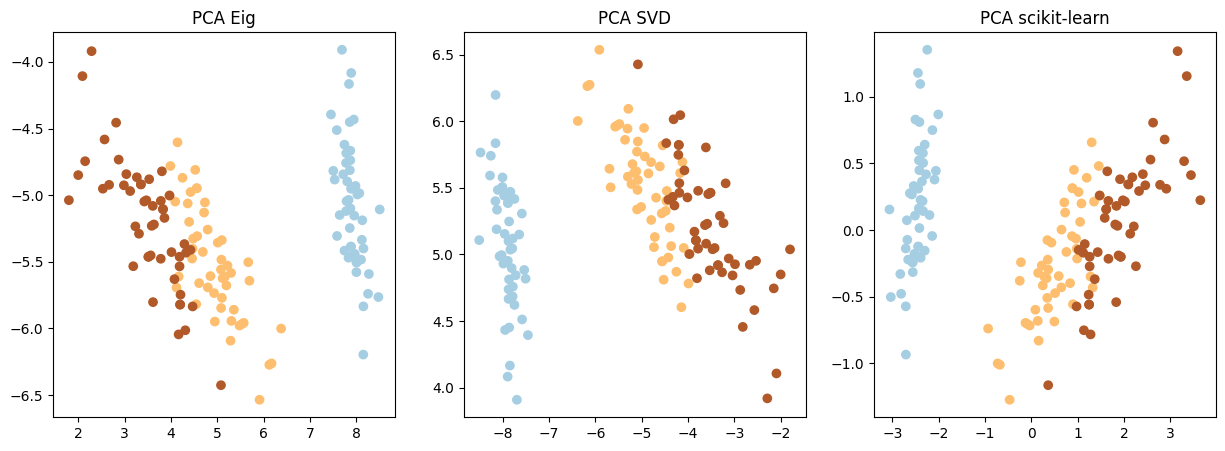

In [ ]:
#Ahora se graficaran los tres metodos para compararlos
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#Transformamos los datos usando las diferentes implementaciones de PCA
proj = pca3d_2c.transform(p3d)
projsvd = pcasvd3d_2c.transform(p3d)
skproj = skpca.transform(p3d)

from matplotlib import cm

axs[0].scatter(proj[:, 0], proj[:, 1], c=iris.target, cmap=cm.Paired)
axs[0].set_title('PCA Eig')
axs[1].scatter(projsvd[:, 0], projsvd[:, 1], c=iris.target, cmap=cm.Paired)
axs[1].set_title('PCA SVD')
axs[2].scatter(skproj[:, 0], skproj[:, 1], c=iris.target, cmap=cm.Paired)
axs[2].set_title('PCA scikit-learn')
plt.show()

## K-means clustering

Es un algoritmo no supervisado, que se utiliza para encontrar patrones escondidos dentro de los conjuntos de los datos y forman clusters determinando similitudes dentro de los conjuntos de los datos y colocando a los objetos más similares en el mismo grupo, el cual es llamado cluster.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:720/format:webp/1*rw8IUza1dbffBhiA4i0GNQ.png)

La agrupación por K-means sigue una regla iterativa simple para clasificar un conjunto de datos sin etiquetas, o más específicamente, para formar racimos.

La agrupación tiene una amplia gama de aplicaciones en biología para estudiar datos de expresión, reutilización de fármacos y categorización de organismos o proteínas.



K-means tiene como objetivo la partición de un conjunto de $n$ observaciones en $k$ grupos en el que cada observación pertenece al grupo cuyo valor medio o más cercano. Cada elemento pertenece a un solo grupo.





### La forma en que funciona el algoritmo de k-means es la siguiente:

- Especifique el número de grupos K.

- Inicializar las coordenadas de los centroides.
  Los centroides se inicializan en coordenadas aleatorias.

- Asignación de cada punto a un clúster
  Se calcula la distancia de cada punto a cada centride, y se agrupa con aquel centroide más proximo.

- Se recalculan los centroides de los clústers
  una vez que se tienen todos los puntos asignados a un cluster, se recalculan los centrodes de manera que vuelven a ser los centros de cada cluster.

- Se repiten los paso hasta llegar a un criterio de parada.



![texto del vínculo](https://miro.medium.com/v2/resize:fit:1400/1*xmP2wO8ODdlmOKbo6ZCnzw.png)

### Criterios de parada

- Los centroides dejan de cambiar.

- Los puntos dehan de cambiar de clúster.

- Limite de iteraciones.

El algoritmo k-means resuelve un problema de optimización, siendo la función a optimizar (minimizar) la suma de las distancias cuadráticas de cada objeto al centroide de su cluster.

Los objetos se representan como vectores reales de $d$ dimensiones $(x_1, x_2, ..., x_n)$ y el algoritmo k-means construye $k$ grupos donde se minimiza la suma de distancias de los objetos, dentro de cada grupo $S=\{S_1,S_2,...,S_k\}$, a su centroide. El problema se puede formular de la siguiente forma:

$min_sE(\mu_i) =min_s\sum_{i=1}^k\sum||x_j-\mu_i||^2$

donde $S$ es un conjunto de datos cuyos elementos son los objetos $x_i$ representados por vectores, donde cada uno de sus elementos representa una característica o atributo. Tendremos  $k$  grupos o clusters con su correspondiente centroide $\mu_i$.

En cada actualización de los centriodes, desde el punto de vista matemático, imponemos la condición necesaria de extremo a la función $E(\mu_i)$ que, para la función cuadrática es

$\frac{1}{|S_i^{(t)}}\sum {x_j}$

y se toma el promedio de los elementos de cada grupo como nuevo centroide.


### Pros y Contras

Ventajas
- Es eficiente, converge rápidamente
- La busqueda heurística termina en un óptimo local

Desventajas
- No robusto frente a observaciones atípicas
- No aplicable a variables categóricas
- No funciona si se buscan grupos convexos
- El número de grupos K se debe especificar


# Implementación de K-means usando Sklearn

In [ ]:
import matplotlib.pyplot as plt


Podemos generar un conjunto de datos ficticios para probar nuestra implementación.

Para generar los datos utilizamos una biblioteca de sklearn llamada datasets. Particularmente el método "make_blobs". El cual crea conjuntos de datos aleatorios con una cantidad determinada de muestras, clustering y características.

Text(0, 0.5, 'X2')

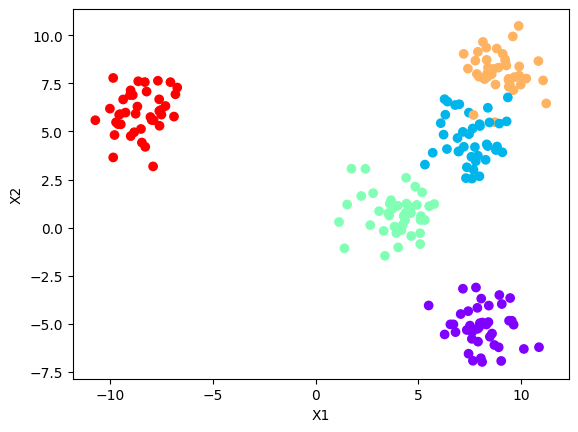

In [ ]:
from sklearn.datasets import make_blobs
# Create Data

data = make_blobs(n_samples=200, n_features=2,
centers=5, cluster_std=1,random_state=150)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X2')

### Elección del número de clusters

La elección del numero de clustering es determinante, por lo que para elegir el valor óptimo de k, entrenaremos el modeo con diferentes valores de k mientras observamos la suma de cuadrados dentro de un grupo (WCSS).

La distania de los puntos a su centroide se calculan y se eleva al cuadrado. A continuación, se suman todas las distancias al cuadrado para calcular el error.

A medida que aumenta el valor de k, el error disminuye. A partir del grafico de WCSS vs el valor $k$, podemos determinar el valor optimo.

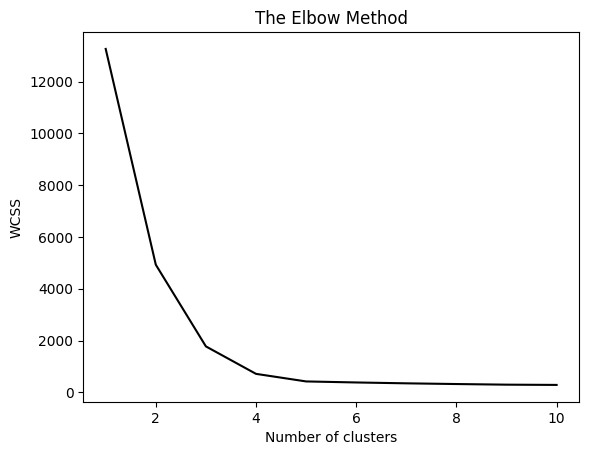

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 150)
  kmeans.fit(data[0])
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,color='k')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Este grafico es denominada grafico del codo (Elbow), en el cual se observa que la pendiente del error se estabiliza a partir de k=5.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init = 'k-means++')
kmeans.fit(data[0])

KMeans(n_clusters=5)

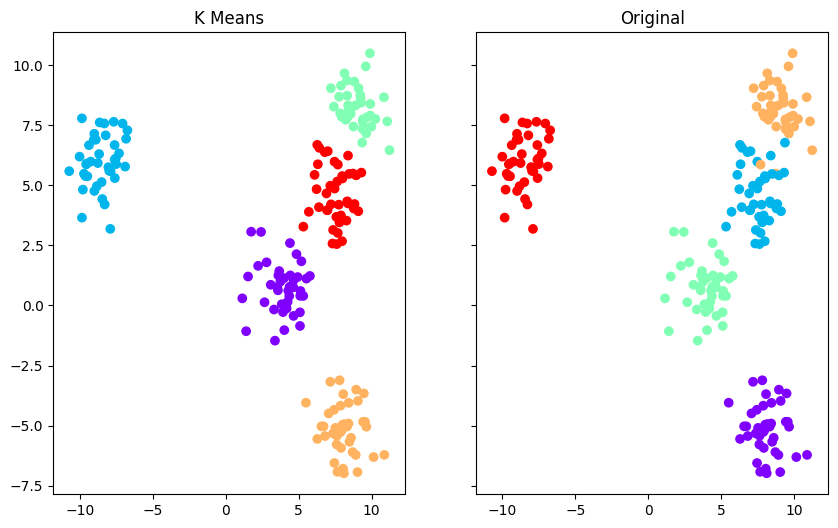

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

Podemos observar que el área y la estructura de los clusters originales y los clusters predichis por k-means som en su mayoría similares con errores mínimos en las regiones superpuestas


In [ ]:
kmeans.cluster_centers_

array([[ 3.89242402,  0.72606842],
       [-8.53502186,  5.98022091],
       [ 9.01735573,  8.23432609],
       [ 8.1037214 , -5.1507853 ],
       [ 7.51724497,  4.61232782]])

### K-means clustering aplicada a genes diferencialmente expresados



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia_Datos_Biologia_PCBio/Unsupervised_learning/DEGs.csv')
dataset.head()

GB_ACC  Control_1  Control_2  Control_3  Control_4  Treated_1  \
0  NM_080863   8.163398   7.315602   7.305606   8.657140   9.642052   
1   BU682208   7.779391   7.172927   3.944858   6.507795   7.837943   
2   BC012528   8.587215   7.062856   6.277985   4.336283   8.104861   
3   BC036407   8.820179   9.316734   9.170426   7.210428   9.704077   
4   BC029869   7.830990   4.209453   6.137504   4.078951   7.001127   

   Treated_2  Treated_3  Treated_4  
0   8.896332   9.869440   8.719047  
1   8.327777   8.751544   7.235536  
2   8.756223   9.707532   7.955940  
3  10.421329  11.122569   9.643676  
4   7.326429   8.431289   7.835419

El conjunto de datos DEG contiene la columna como números de acceso de GenBank, y el resto de las ocho columnas presentan los valores de expresión de los cuatro controles y las cuatro muestras tratadas.

In [ ]:
dataset.describe()

Control_1   Control_2   Control_3   Control_4   Treated_1   Treated_2  \
count  132.000000  132.000000  132.000000  132.000000  132.000000  132.000000   
mean     9.070583    8.508938    8.248652    8.055377    8.402029    8.117435   
std      1.278072    1.767599    2.001190    2.197749    2.200985    2.345779   
min      6.685099    3.277985    1.722466    2.485427    1.887525    2.201634   
25%      8.120952    7.395747    7.269044    6.651550    7.097323    6.638132   
50%      8.827167    8.312169    8.144647    8.276980    8.735816    8.513519   
75%      9.985888    9.699045    9.618288    9.548193    9.843254    9.802632   
max     12.353533   12.883617   12.502359   12.716798   12.905443   13.301425   

        Treated_3   Treated_4  
count  132.000000  132.000000  
mean     8.295692    8.542134  
std      2.321438    2.100473  
min      2.201634    2.104337  
25%      6.978917    7.448343  
50%      8.680008    8.907190  
75%      9.870595    9.726872  
max     13.024049   12.892391

Hay 132 genes, que deben agruparse en función de su expresión en una condición particular (es decir, tratados con control)

In [ ]:
dataset.isna().sum()

GB_ACC       0
Control_1    0
Control_2    0
Control_3    0
Control_4    0
Treated_1    0
Treated_2    0
Treated_3    0
Treated_4    0
dtype: int64

El conjunto de datos no contiene valores nulos. A continuación, separaremos los valores de expresión de las muestras tratadas. Hay cuatro valores de expresión para cada gen en la condición tratada, por lo tanto, cuatro características para cada gen

In [ ]:
new_data=dataset.iloc[:,5:]
new_data.head()

Treated_1  Treated_2  Treated_3  Treated_4
0   9.642052   8.896332   9.869440   8.719047
1   7.837943   8.327777   8.751544   7.235536
2   8.104861   8.756223   9.707532   7.955940
3   9.704077  10.421329  11.122569   9.643676
4   7.001127   7.326429   8.431289   7.835419

Usando el método del codo, determinaremos el valor óptimo de k.

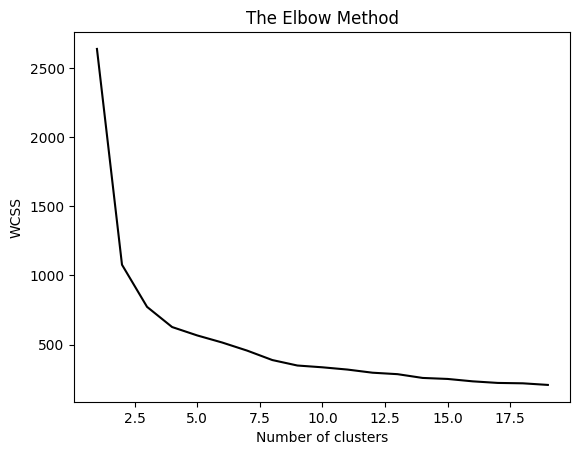

In [ ]:
wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 150)
  kmeans.fit(new_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss,color='k')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Según el método del codo, es probable que el número de grupos óptimos sea ocho

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,init = 'k-means++', random_state=150)
kmeans.fit(new_data)

KMeans(random_state=150)

In [ ]:
kmeans.labels_

array([2, 4, 2, 1, 4, 1, 6, 2, 6, 4, 7, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 7,
       2, 6, 6, 1, 1, 2, 2, 1, 1, 5, 1, 4, 4, 4, 2, 2, 2, 6, 1, 6, 4, 2,
       2, 1, 1, 4, 2, 6, 4, 4, 1, 1, 1, 1, 2, 4, 1, 2, 2, 1, 6, 1, 2, 4,
       2, 5, 6, 3, 1, 5, 5, 7, 0, 3, 3, 5, 3, 2, 3, 5, 7, 1, 4, 7, 3, 4,
       4, 4, 0, 7, 1, 4, 3, 3, 0, 4, 0, 4, 1, 4, 1, 0, 4, 4, 0, 5, 1, 3,
       4, 7, 4, 3, 0, 2, 2, 4, 4, 7, 0, 7, 1, 5, 7, 4, 5, 3, 5, 3, 3, 3],
      dtype=int32)

En el siguiente paso, asignaremos los números de grupo recuperados en el paso anterior a los ID de acceso de GenBank.

In [ ]:
cluster_genes = pd.concat([dataset.iloc[:,0],pd.DataFrame(kmeans.labels_)],axis=1)
cluster_genes.columns= ['GB_ACC','Groups']
cluster_genes

GB_ACC  Groups
0    NM_080863       2
1     BU682208       4
2     BC012528       2
3     BC036407       1
4     BC029869       4
..         ...     ...
127   AA608813       3
128   AI732427       5
129   AW664311       3
130     H79994       3
131   AI732331       3

[132 rows x 2 columns]

A partir de aquí, los genes se agrupan en grupos respectivos utilizando la "groupby function" de dataframe de Pandas, que toma el nombre de la columna en función de dónde el usuario desea agrupar los datos.

In [ ]:
cluster = cluster_genes.groupby('Groups')
cluster.describe()

GB_ACC                       
        count unique        top freq
Groups                              
0           8      8   AI570261    1
1          28     28   BC036407    1
2          26     26  NM_080863    1
3          14     14  NM_058176    1
4          27     27   BU682208    1
5          10     10   AK024158    1
6           9      9   BM823647    1
7          10     10   BC028111    1

Podemos ver que el grupo 3 tiene el mayor número de genes.

Podemos recuperar los elementos de un grupo en partícular.

In [ ]:
cluster = {k: v for k, v in cluster_genes.groupby('Groups')}
cluster[1]

GB_ACC  Groups
3     BC036407       1
5     BC026308       1
13    BC017989       1
14    AA604601       1
17   NM_015472       1
20   NM_015865       1
25    BC001830       1
26    BE738425       1
29      T16257       1
30    AW851559       1
32   NM_022648       1
40    AI922198       1
45    AW003230       1
46    AI394334       1
52    BE379761       1
53      R41907       1
54    AW136983       1
55    BF942281       1
58    AA504249       1
61    AI034356       1
63    AI679812       1
70   NM_153016       1
83      U39361       1
92   NM_014954       1
100   BF673699       1
102   AC003999       1
108   AB022433       1
122   AI078534       1

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE


## T- distributed Stochastic Neighbor Embedding (T-SNE)

- Es una técnica de reducción de dimensiones no parametrica en el que los datos de altadimensionalidad son proyectados a un espacio de menor dimensión, mientras preserva las relaciones entre los puntos de los datos originales de alta dimensionalidad.

- Este fue introducido por Maaten y Hinton en 2008.

![picture](https://drive.google.com/uc?id=1byjtXfgt-D0OCMsH2Ev6XIQAtmj1By9t)



### Definición
Supongamos que tenemos una serie de observaciones $X_1,...,X_n$ en la que cada observación pertenece a un espacio dimensionalmente grande es decir $X_i\in \Re ^P$ con $P$ mucho mayor que 2.

Queremos hallar una representación de las $n$ observaciones en un espacio menor, es decir, buscamos $Y_1,...Y_n$ en la que cada observación pertenece a un espacio menor, es decir $Y_i\in \Re ^d$ con $d$ igual a 2 o 3.

El objetivo es presevar lo mejor posible ciertas características de la muestra en el espacio original.

### Aplicaciones
- Visualización
- Análisis exploratorio
- Preprocesamiento de datos
- Selección de características
- Inicialización para otros algoritmos
- Comparación de conjuntos de datos
- Detección de anomalías

In [ ]:
clusters = kmeans.fit_predict(new_data)
# Aplicar t-SNE para reducir la dimensionalidad a 2D
tsne = TSNE(n_components=2, random_state=150, perplexity=10)
tsne_results = tsne.fit_transform(new_data)

In [ ]:
# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Cluster'] = clusters

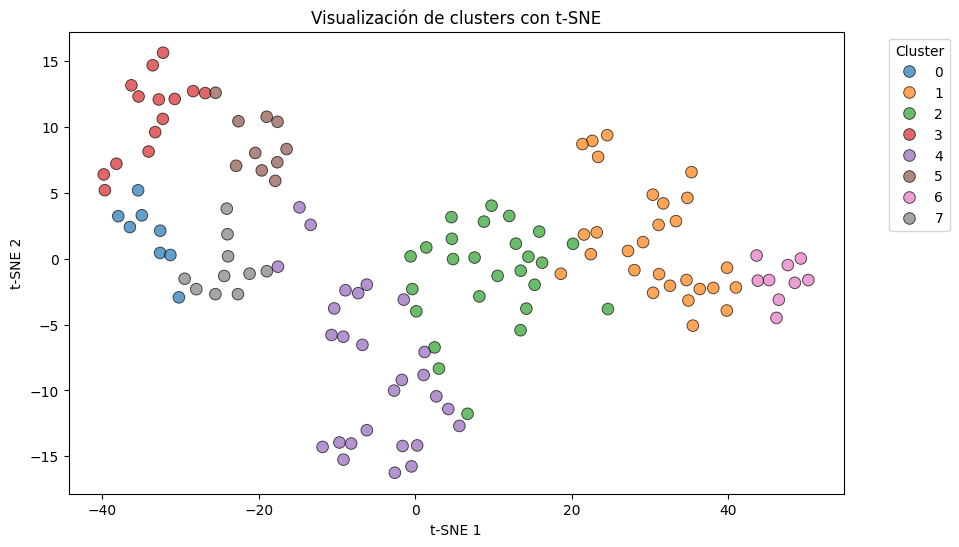

In [ ]:
# Visualización de los clusters con t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='t-SNE 1', y='t-SNE 2', hue=tsne_df['Cluster'],
                palette='tab10', s=70, alpha=0.7, edgecolors='k')
plt.title('Visualización de clusters con t-SNE')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='t-SNE 1', ylabel='t-SNE 2'>

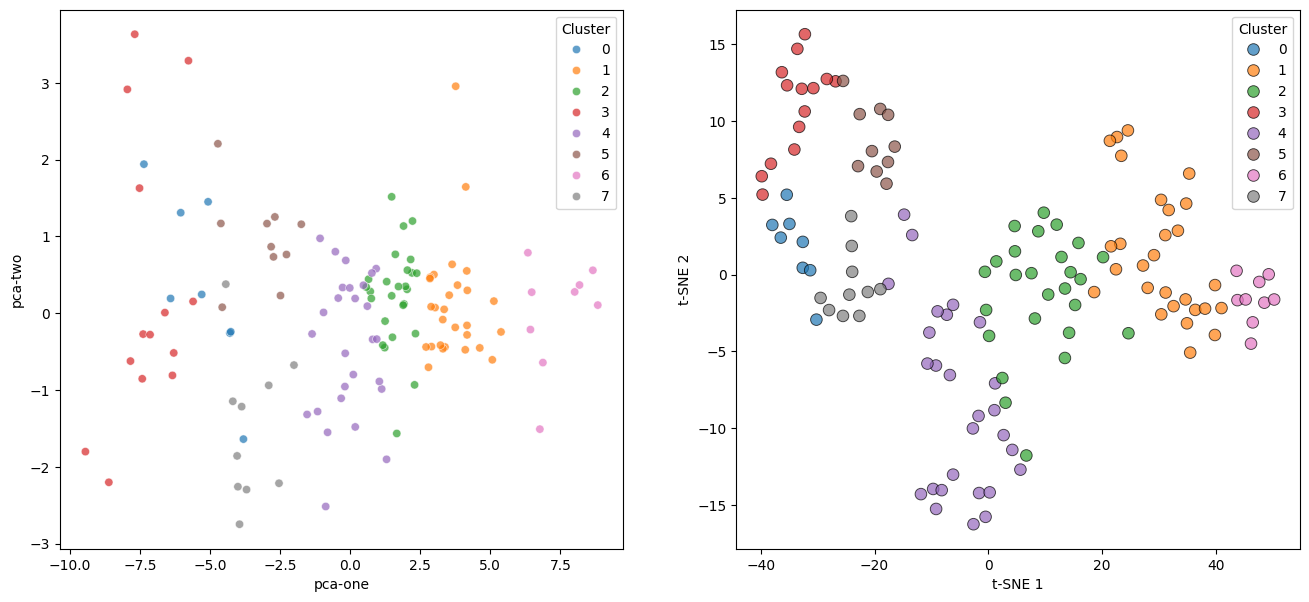

In [ ]:
#Aplicamos PCA con tres componentes para verificar como se comporta las varianzas explicadas.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(new_data)

tsne_df['pca-one'] = pca_result[:,0]
tsne_df['pca-two'] = pca_result[:,1]

# Comparamos PCA y TSNE
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=tsne_df['Cluster'],
    palette='tab10',
    data=tsne_df,
    alpha=0.7,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    data=tsne_df,
    x='t-SNE 1', y='t-SNE 2',
    hue=tsne_df['Cluster'],
    palette='tab10', s=70, alpha=0.7,
    edgecolors='k',
    ax=ax2)


## Factorización No Negativa de Matrices


- Un problema bastante extendido en diferentes técnicas de análisis de datos consiste en encontrar una representación adecuada de los datos.
- Un tipo de representación de gran utilidad será aquella que permita reducir las dimensiones de los datos a la vez que muestra ciertas características del conjunto de éstos que permanezcan ocultas a priori.
- NMF es una técnica de reciente creación cuya principal utilidad consiste en encontrar una representación lineal de los datos, que han de ser no negativos.

Dada una matriz no negativa $A$, se puede encontrar los factores de la matriz no negativos $W$ y $H$

Para una matriz $A$ de $mxn$ dimensiones, donde cada elemento es $\geq 0$, NMF puede factorizarla en dos matrices $W$ y $H$, que tienen dimensiones de $mxk$ y $kxn$ respectivamente, estas dos matrices solo contienen elementos no-negativos.

![picture](
https://drive.google.com/uc?id=1doa7fMTxiGTPbL9ITHSaIRYW4G1R24Nn)

- $A$ es la matriz original
- $W$ es la matriz de características
- $H$ es la matriz de coeficientes (Pesos asociados a $W$)
- $k$ Aproximación de rango bajo de $A$ ($k\geq min(m,n)$)

### Como funciona?

- NMF descompone datos multivariados mediante la creación de un número de características definido por el usuario.
Cada característica es una combinación lineal del conjunto de atributos original; los coeficientes de estas combinaciones lineales no son negativos.

- NMF descompone una matriz de datos $A$ en el producto de dos matrices de rango inferior $W$ y $H$ para que $A$ sea aproximadamente igual a $W$ por $H$.

- NMF usa un procedimiento iterativo para modificar los valores iniciales de $W$ y $H$ para que el producto se acerque a $A$.

- El procedimiento termina cuando el error de aproximación converge o se alcanza el número especificado de iteraciones.

## Aplicación

- Procesamiento de imágenes

![picture](https://drive.google.com/uc?id=1BmcTici-1UttOlHgy5AxhVdlBE-d5OlP)

- Minería de textos

![picture](https://drive.google.com/uc?id=1y4yIRWzHv9e4bT3XUJH7IpyjKGEVgeNC)

### Ahora vamos a trabajar con el datset de datos de expresión

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia_Datos_Biologia_PCBio/Unsupervised_learning/DEGs.csv', index_col=0)
dataset.head()

Control_1  Control_2  Control_3  Control_4  Treated_1  Treated_2  \
GB_ACC                                                                        
NM_080863   8.163398   7.315602   7.305606   8.657140   9.642052   8.896332   
BU682208    7.779391   7.172927   3.944858   6.507795   7.837943   8.327777   
BC012528    8.587215   7.062856   6.277985   4.336283   8.104861   8.756223   
BC036407    8.820179   9.316734   9.170426   7.210428   9.704077  10.421329   
BC029869    7.830990   4.209453   6.137504   4.078951   7.001127   7.326429   

           Treated_3  Treated_4  
GB_ACC                           
NM_080863   9.869440   8.719047  
BU682208    8.751544   7.235536  
BC012528    9.707532   7.955940  
BC036407   11.122569   9.643676  
BC029869    8.431289   7.835419

In [ ]:
X = dataset.values  # Convertir a matriz numpy

# Máximo valor de k permitido
max_k = min(X.shape)  # min(n_genes, n_muestras)
componentes = list(range(2, max_k))  # Rango válido de valores de k
cophenetic_scores = []
valid_k = []  # Lista para almacenar los valores de k que sí funcionaron


In [ ]:
for k in componentes:
    try:
        nmf = NMF(n_components=k, init="nndsvda", random_state=42)  # Usamos "nndsvda" por estabilidad
        W = nmf.fit_transform(X)

        # Calcular matriz de distancia entre las representaciones latentes
        dist_matrix = pdist(W, metric='euclidean')

        # Calcular matriz cophenética usando clustering jerárquico
        linkage_matrix = linkage(dist_matrix, method='average')
        cophenet_corr, _ = cophenet(linkage_matrix, dist_matrix)

        # Guardar resultados
        cophenetic_scores.append(cophenet_corr)
        valid_k.append(k)  # Guardar solo los valores de k válidos
    except ValueError as e:
        print(f"Skipping k={k}: {e}")

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


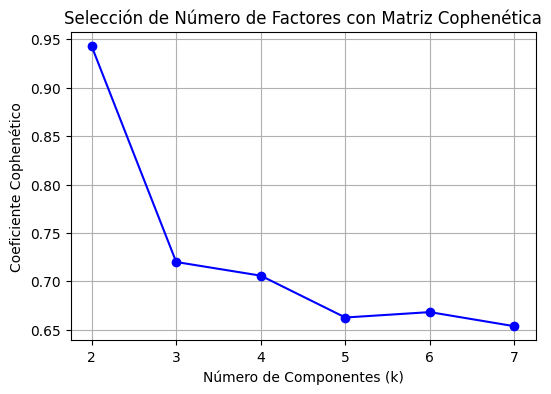

In [ ]:
# Graficar coeficiente cofenético vs número de componentes
plt.figure(figsize=(6,4))
plt.plot(valid_k, cophenetic_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Número de Componentes (k)")
plt.ylabel("Coeficiente Cophenético")
plt.title("Selección de Número de Factores con Matriz Cophenética")
plt.grid()
plt.show()

In [ ]:
# Separar los controles y las réplicas de análisis
controles = dataset.iloc[:, :4]  # Primeras 4 columnas
replicas = dataset.iloc[:, 4:8]  # Últimas 4 columnas

In [ ]:
# Unir ambos grupos en una sola matriz de datos para NMF
X = dataset.values  # Convertir a matriz numpy


In [ ]:
# Aplicar NMF con un número de componentes (ajusta según tu análisis)
n_components = 2  # Puedes cambiar el número de factores latentes
nmf = NMF(n_components=n_components, init="nndsvd", random_state=42)
W = nmf.fit_transform(X)  # Matriz base (genes x componentes)
H = nmf.components_  # Matriz de coeficientes (componentes x muestras)


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
# Convertir en DataFrames para mejor interpretación
W_df = pd.DataFrame(W, index=dataset.index, columns=[f"Componente_{i+1}" for i in range(n_components)])
H_df = pd.DataFrame(H, columns=dataset.columns, index=[f"Componente_{i+1}" for i in range(n_components)])


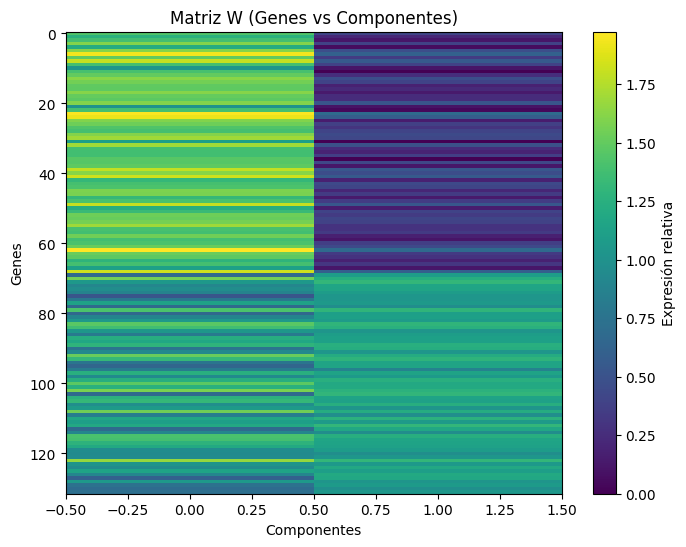

In [ ]:
# Graficar la matriz W (genes vs componentes)
plt.figure(figsize=(8, 6))
plt.imshow(W, aspect="auto", cmap="viridis")
plt.colorbar(label="Expresión relativa")
plt.xlabel("Componentes")
plt.ylabel("Genes")
plt.title("Matriz W (Genes vs Componentes)")
plt.show()

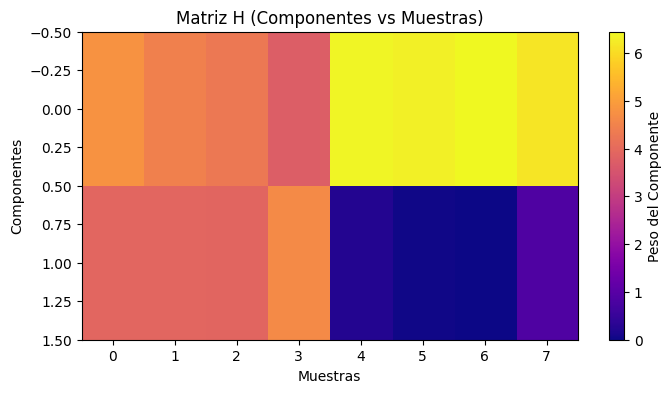

In [ ]:
# Graficar la matriz H (componentes vs muestras)
plt.figure(figsize=(8, 4))
plt.imshow(H, aspect="auto", cmap="plasma")
plt.colorbar(label="Peso del Componente")
plt.xlabel("Muestras")
plt.ylabel("Componentes")
plt.title("Matriz H (Componentes vs Muestras)")
plt.show()

In [ ]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.6/597.6 kB 9.4 MB/s eta 0:00:00


In [ ]:
import gseapy as gp

In [ ]:
annotation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia_Datos_Biologia_PCBio/Expression_Data/annotation_file.csv')
#Annotation File Contains
annotation.head()

ID_REF  GB_ACC       Gene Symbol     ENTREZ_GENE_ID
0  1007_s_at  U48705  DDR1 /// MIR4640  780 /// 100616237
1    1053_at  M87338              RFC2               5982
2     117_at  X51757             HSPA6               3310
3     121_at  X69699              PAX8               7849
4  1255_g_at  L36861            GUCA1A               2978

In [ ]:
# Diccionario para mapear los nombres de los genes a sus símbolos
mapa_genes = annotation.set_index("GB_ACC")["Gene Symbol"].to_dict()

In [ ]:
# Seleccionar los genes más importantes en cada factor
top_n = 10  # Cambia este valor si quieres más genes
genes_importantes = {}

In [ ]:
for factor in W_df.columns:
    top_genes = W_df[factor].nlargest(top_n).index  # Obtener los genes con mayor peso
    genes_importantes[factor] = top_genes.tolist()


In [ ]:
# Crear un diccionario con listas de símbolos génicos por cada factor
genes_simbolos = {}

for factor, genes in genes_importantes.items():
    genes_simbolos[factor] = [mapa_genes.get(gene, "Unknown") for gene in genes]

# Mostrar los símbolos génicos de los genes más importantes por cada factor
for factor, simbolos in genes_simbolos.items():
    print(f"\n🔹 Genes más importantes en {factor}:")
    print(simbolos)

    # Filtrar genes "Unknown" y NaN para evitar errores en el análisis de enriquecimiento
    simbolos_filtrados = [g for g in simbolos if g != "Unknown" and pd.notna(g)]

    if len(simbolos_filtrados) > 0:  # Asegurar que hay genes válidos
        enr = gp.enrichr(
            gene_list=simbolos_filtrados,
            gene_sets=['GO_Biological_Process_2021'],
            organism='Human',  # Asegurar que el organismo sea correcto
            outdir='test/enrichr_kegg',
            cutoff=1  # Ajustar si es necesario
        )

        # Mostrar los primeros resultados
        print(enr.results[['Gene_set', 'Term', 'Overlap', 'P-value', 'Genes']].head())
    else:
        print("⚠️ No hay suficientes genes válidos para el análisis de enriquecimiento.")


🔹 Genes más importantes en Componente_1:
['ARHGEF40', 'ID4', 'LOC441081', 'RBPMS', 'ZNF595', nan, nan, 'AK024134 /// PPM1H', 'TBX3', 'TNS1']
                     Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   

                                                Term Overlap   P-value Genes  
0          female genitalia development (GO:0030540)     1/5  0.001999  TBX3  
1  sinoatrial node cell differentiation (GO:0060921)     1/5  0.001999  TBX3  
2  regulation of cell proliferation involved in h...     1/5  0.001999  TBX3  
3       tripartite regional subdivision (GO:0007351)     1/6  0.002398  TBX3  
4  anterior/posterior axis specification, embryo ...     1/6  0.002398  TBX3  

🔹 Genes más importantes en Componente_2:
['CCDC71L', 'MAP4', 'OLFM3', 'PLAC8', 'LMO3', 'TMEM189 /// TMEM189-UBE2V1 /// UBE2V1 /// UBE2V2', 'SAC3D1', 'CCAR2', 'SKAP2', 'LOC101930324 ///

## Clutering

### Métrica de distancia

* El primer requisito para un clustering es la métrica de distancia.

* Este es simplemente una medida de que tan similar es una variable con respecto a otra.

* Existen muchos opciones de métrica de distancia y la elección de la métrica es muy importante para realizar el clustering.


### Distancia Manhattan o L1 norm

$d_{AB}= \sum^n _{i=1} | e_{Ai} - e_{Bi}|$

donde $d_{AB}$ es la distancia entre dos variables $A$ y $B$ y los $e_{Ai}$ y $e_{Bi}$ son valores en el ith valor para las variables $A$ y $B$.

### Distancia Euclidiana o L2 norm
Es la suma de las distancias al cuadrado y toma la raíz del valor resultante.

$d_{AB}= \sqrt{\sum^n_{i=1}(e_{Ai}-e{bi})^2} $

Esta es la métrica por defaul para muchos algoritmos de clustering.
Debido a la operación de cuadratura, los valores que son muy diferentes obtienen una mayor contribución a la distancia. Debido a esto, en comparación con la distancia de Manhattan, puede verse más afectada por valores atípicos. Pero, en general, si los valores atípicos son raros, esta métrica de distancia funciona bien

### Distancia de correlación

$d_{AB}=1-p$

donde, $p$ es el coeficiente de la correlación de Pearson entre dos vectores. Usando esta métrica los vectores que tengan un patrón similar tendrán una distancia pequeña, mientras que cuando los vectores tengan patrones diferentes tendrán una distancia grande.


### Hiearchical clustering

Este es uno de los algoritmos de clustering más ubicuos.

Con este algoritmo se pueden ver las relaciones de puntos de datos individuales y las relaciones grupales.

Esto se logra uniendo sucesivamente pequeños grupos entre sí en función de la distancia entre de ellos.


#### Dendograma

Con consecutivos pasos, se obtiene una estructura de árbol o un dendograma que muestra la relación entre todos los puntos de datos individuales y los grupos.

La altura del dendograma es la distancia entre grupos.

![ texto del vínculo](https://miro.medium.com/v2/resize:fit:640/format:webp/1*2MAGLkkfRXSXhQ9pEgK0WQ.png)


Un dendrograma no necesita ramificarse a intervalos regulares de arriba a abajo, ya que la dirección vertical (eje y) en él representa la distancia entre los grupos en alguna métrica. A medida que sigues bajando en un camino, sigues dividiendo los grupos en unidades cada vez más pequeñas hasta que tu nivel de granularidad alcanza la muestra de datos. En la situación al revés, cuando atraviesas en dirección ascendente, en cada nivel, estás agregando grupos más pequeños en grupos más grandes hasta el punto en que llegas a todo el sistema. Como resultado, la agrupación jerárquica también se conoce como agrupación de agrupación.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:640/format:webp/1*o_AumweJUR9g68y5nzo7fg.png)

### Número de clusters

En el cluster jerárquica, mientras construimos el dendrograma, no mantenemos ninguna suposición sobre el número de grupos. Una vez que se ha construido el dendrograma, cortamos esta estructura horizontalmente. Todas las ramas secundarias resultantes formadas debajo del corte horizontal representan un grupo individual en el nivel más alto de su sistema y define la pertenencia al clúster asociada para cada muestra de datos.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:640/format:webp/1*VvOVxdBb74IOxxF2RmthCQ.png)

Una de las preguntas más importantes, es dónde se debe colocar el corte horizontal. La ubicación del corte se puede decidir visualmente o incluso con la opinión de que desea tener una distancia mínima de "y" (la ubicación del corte en el eje y) entre sus grupos.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:720/format:webp/1*TtTvtrxf5p3gg3nfsgUIag.png)

Además, no es una restricción que tengas que cortar el dendrograma a una distancia constante. Basado en la aplicación y el conocimiento del dominio del problema que está tratando de resolver, el dendrograma se puede cortar de manera inconsistente. Por ejemplo, a continuación, en la aplicación de detección de valores atípicos, para separar un par de valores atípicos adyacentes, el corte horizontal varía en diferentes lugares.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:640/format:webp/1*SMOb3q95IxF9EXiCsO4JaQ.png)

### Construcción del dendograma

Hay dos formas de construirlo. Una forma de construirlo es de abajo hacia arriba, donde comienzas desde unidades y sigues fusionando los puntos de datos y subgrupos individuales y vas hasta la parte superior. Esto se conoce como agrupación aglomerativa.

La otra alternativa es el procedimiento opuesto de arriba hacia abajo en el que comienza considerando todo el sistema como un solo clúster y luego lo mantiene subaglomerándolo hasta llegar a muestras de datos individuales. Este proceso se conoce como agrupación divisiva. Cada uno de estos métodos tiene algoritmos separados para lograr sus objetivos.

- Agrupación aglomerativa

Uno de los algoritmos más simples y fáciles de entender utilizados para realizar la agrupación aglomerativa es single linkage. En este algoritmo, comenzamos por considerar cada punto de datos como un subgrupo. Definimos una métrica para medir la distancia entre todos los pares de subgrupos en cada paso y seguimos fusionando los dos subgrupos más cercanos en cada paso. Repetimos este procedimiento hasta que solo haya un grupo en el sistema.

- Agrupación divisiva

Uno de los algoritmos utilizados para realizar la agrupación divisiva son los k-means recursivos. Como su nombre indica, realiza recursivamente el procedimiento de k-means en cada clúster intermedio hasta que encuentre todas las muestras de datos en el sistema o el número mínimo de muestras de datos que desea tener en un clúster. En cada paso de este algoritmo, tienes que ser consciente de cuántos grupos te gustaría crear a continuación.

![texto del vínculo](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*qmI4WT3s5qkgZpaoUji_hw.png)



https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Estos datos son el resultado de análisis químico de vinos cultivados en la misma región de Italia, pero derivados de tres cultivares diferentes. El análisis determinó la cantidad de 13 componentes presentes en cada uno de los tres tipos de vino.

Los atributos son:

1. Alcohol
2. Ácido málico
3. Cenizas
4. Alcalinidad de las cenizas
5. Magnesio
6. Fenoles totales
7. Flavonoides
8. Fenoles no plavonoides
9. Proantocianinas
10. Intensidad de color
11. Tonalidad
12. OD280/OD315 de los vinos diluidos
13. Prolina

https://archive.ics.uci.edu/dataset/109/wine

In [ ]:
# Loading data
# Read the stats
wines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia_Datos_Biologia_PCBio/Unsupervised_learning/Wine.csv')
wines.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [ ]:
# We don’t need the Customer_Segment column. As we have said before,
# hierarchical clustering is an unsupervised machine learning algorithm and works with unlabeled data.
# Remove the Type column
wines = wines.drop(columns=['Customer_Segment'])

In [ ]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
# Let’s get an idea of what we’re working with.
# First rows
print(wines.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

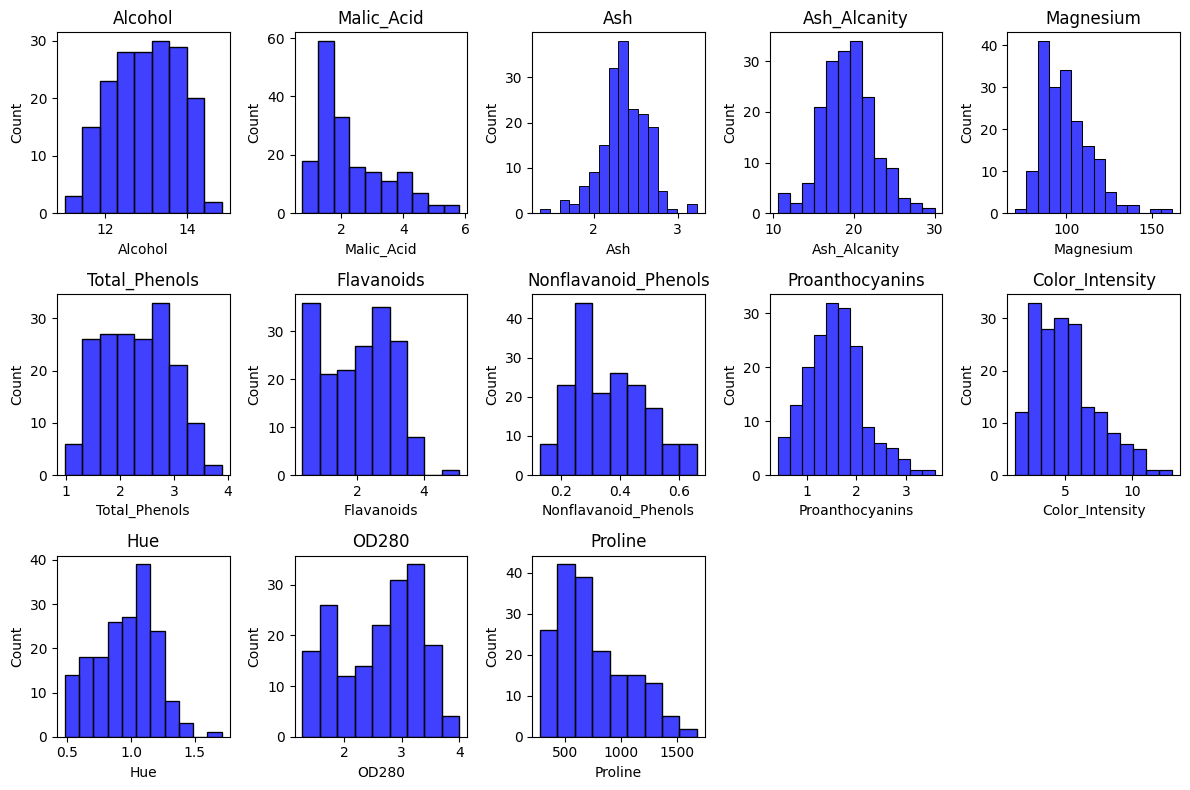

In [ ]:
# First we have to explore and visualize the data.
# Histogram for each Attribute
plt.figure(figsize=(12, 8))
for i, col in enumerate(wines.columns):
    plt.subplot(3, 5, i+1)
    sns.histplot(wines[col], color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

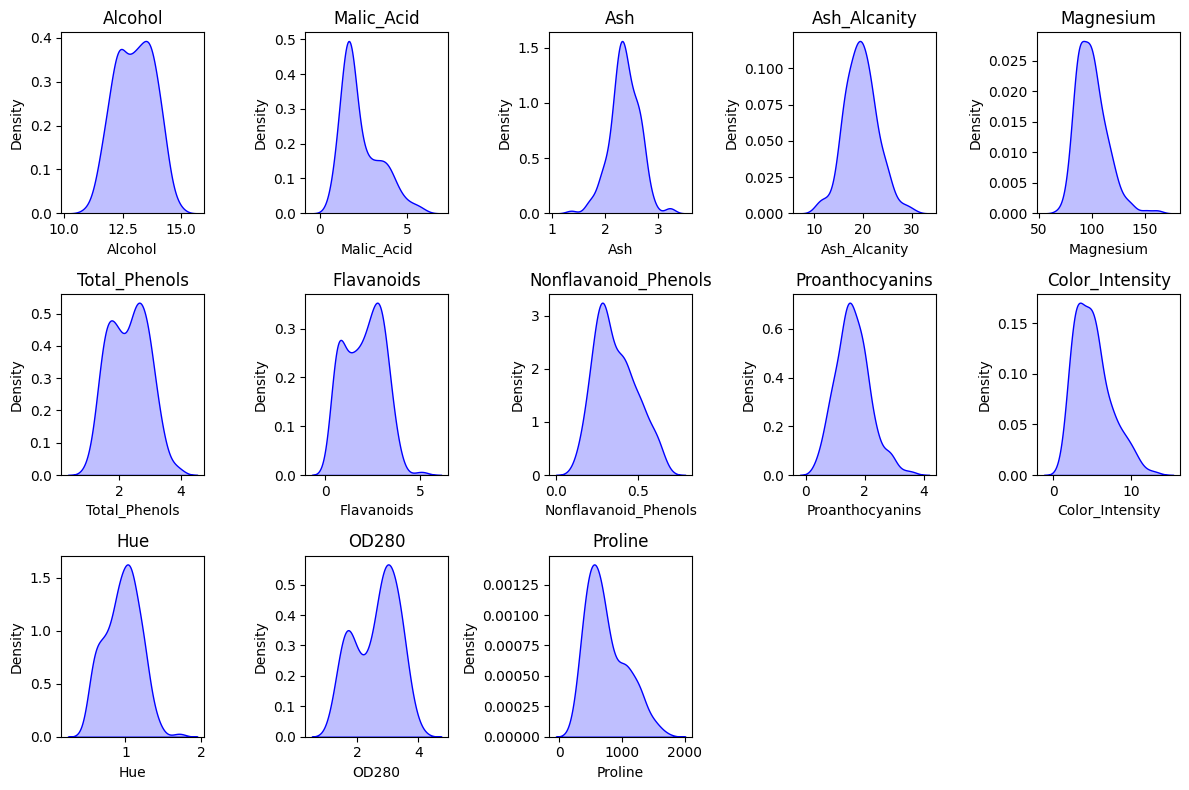

In [ ]:
# Density plot for each Attribute
plt.figure(figsize=(12, 8))
for i, col in enumerate(wines.columns):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(wines[col], color='blue', fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

<Axes: >

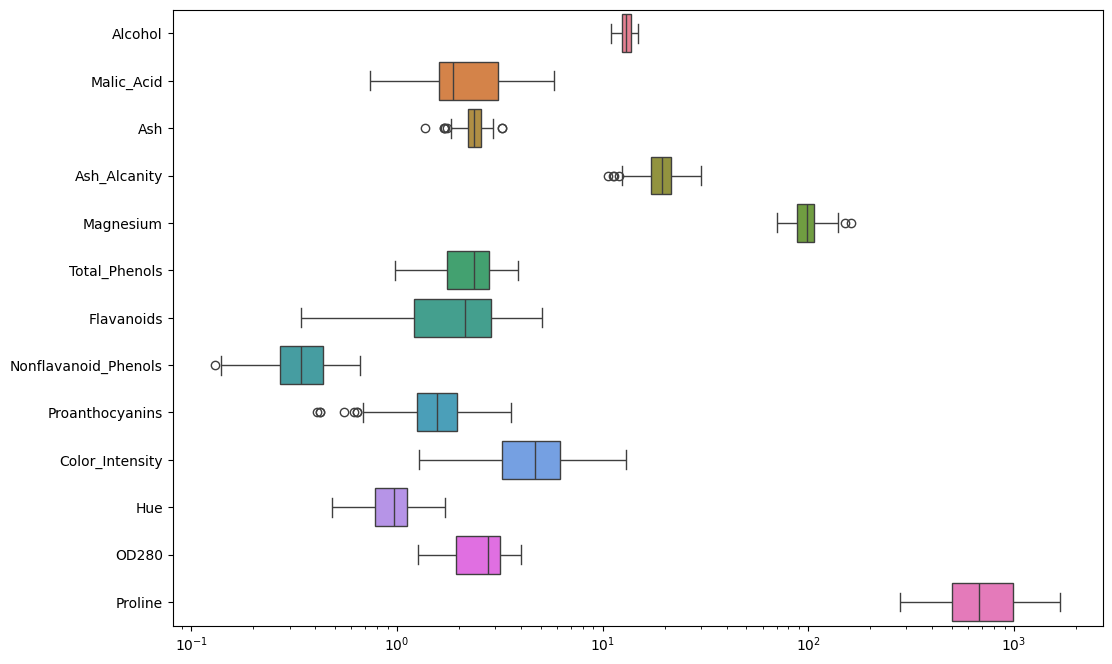

In [ ]:
# Boxplot for each Attribute
plt.figure(figsize=(12, 8))
sns.boxplot(data=wines, orient="h", log_scale=True)

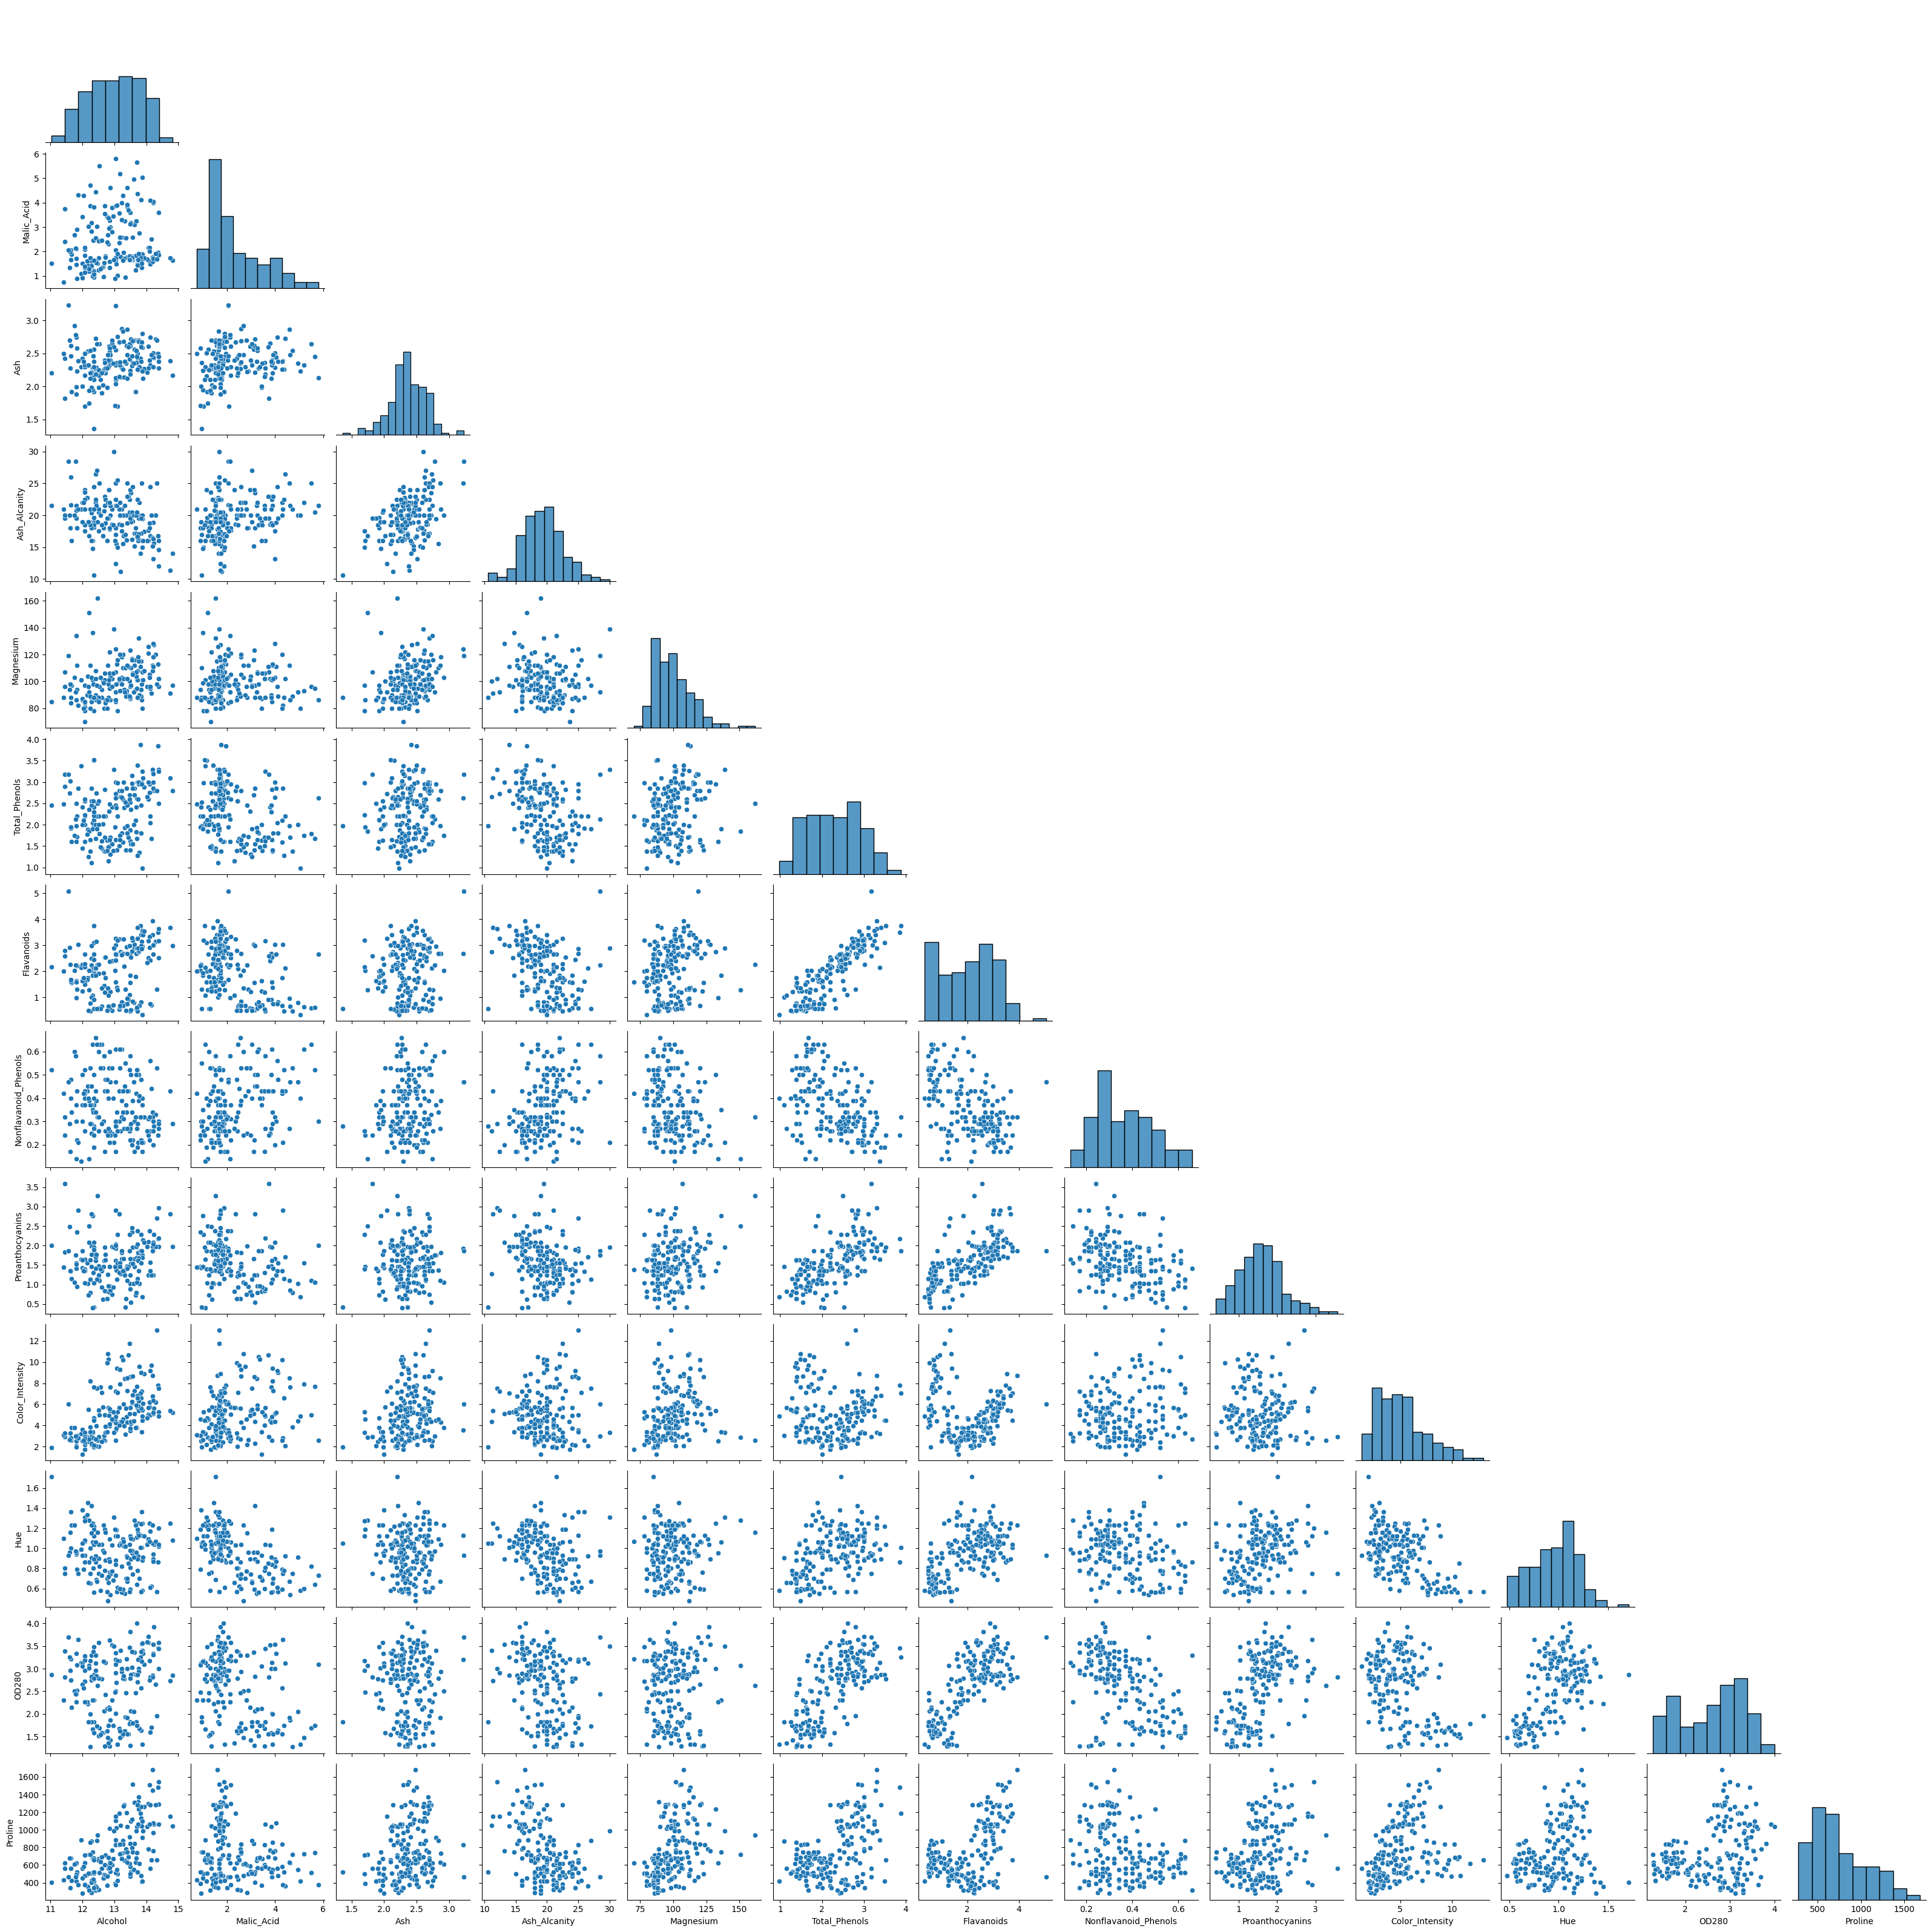

In [ ]:
# What is the relationship between the different attributes? We can use the pairplot() function
# to create a graphical display of pairwise relationships.
sns.pairplot(wines, corner=True)
plt.show()

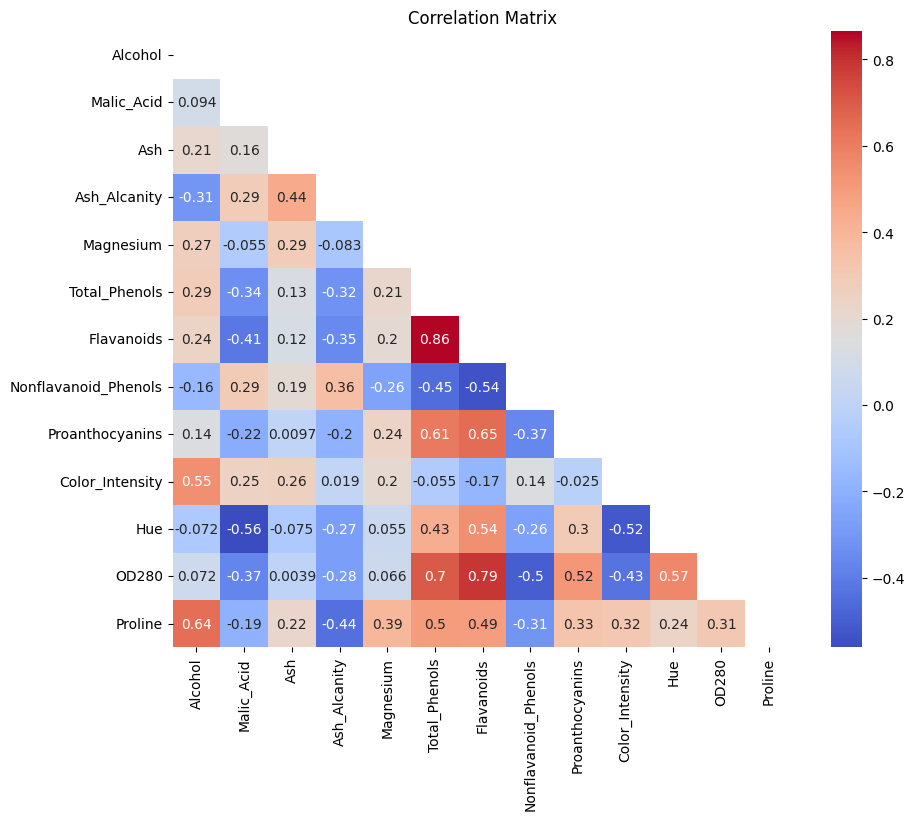

In [ ]:
# Correlation matrix
ut = np.triu(wines.corr())
plt.figure(figsize=(10, 8))
sns.heatmap(wines.corr(), annot=True, cmap='coolwarm', mask = ut)
plt.title("Correlation Matrix")
plt.show()

There is a strong linear correlation between Total_Phenols and Flavanoids. We can model the relationship between these two variables by fitting a linear equation.

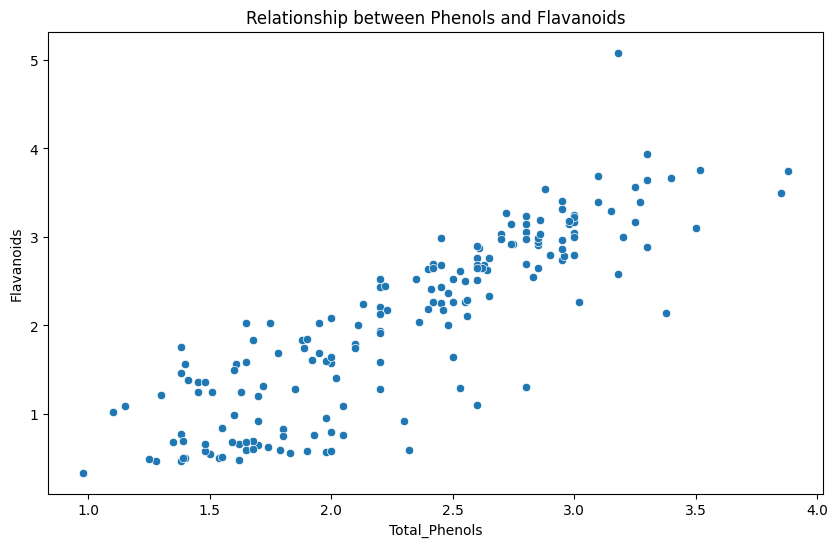

In [ ]:
# Relationship between Phenols and Flavanoids
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Phenols', y='Flavanoids', data=wines)
plt.title("Relationship between Phenols and Flavanoids")
plt.show()

### Data preparation

Now that we have done a exploratory data analysis, we can prepare the data in order to execute the herarchical clustering algorithm.

In [ ]:
# We have to normalize the variables to express them in the same range of values.
# In other words, normalization means adjusting values measured on different scales to a common scale.
# Normalization
scaler = StandardScaler()
wines_norm = pd.DataFrame(scaler.fit_transform(wines), columns=wines.columns)


Text(0.5, 1.0, 'Original data')

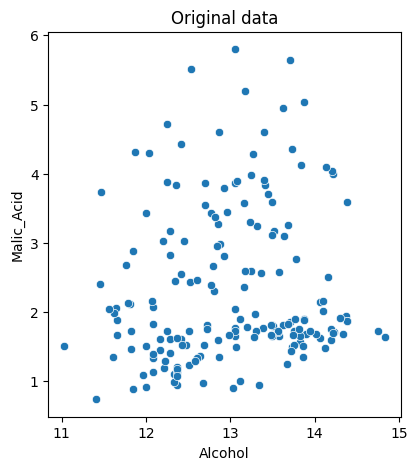

In [ ]:
# Original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Alcohol', y='Malic_Acid', data=wines)
plt.title("Original data")

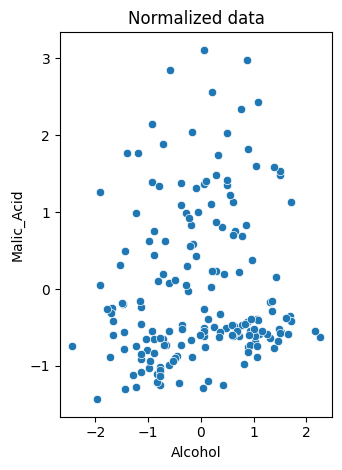

In [ ]:
# Normalized data
plt.subplot(1, 2, 2)
sns.scatterplot(x='Alcohol', y='Malic_Acid', data=wines_norm)
plt.title("Normalized data")
plt.tight_layout()
plt.show()


The points in the normalized data are the same as the original one. The only thing that changes is the scale of the axis.

### Hierarchical clustering execution

El criterio de enlazamiento determina la distancia a utilizar entre los conjuntos de observación. El algoritmo fusionará los pares de conglomerados que minimicen este criterio.

- 'ward' minimiza la varianza de los conglomerados que se fusionan.
- 'average' utiliza la media de las distancias de cada observación de los dos conjuntos.
- El enlazamiento 'completo' o 'maximum' utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.
- 'simple' utiliza el mínimo de las distancias entre todas las observaciones de los dos conjuntos.

In [ ]:
# Calculate the linkage matrix
Z = linkage(wines_norm, 'ward')

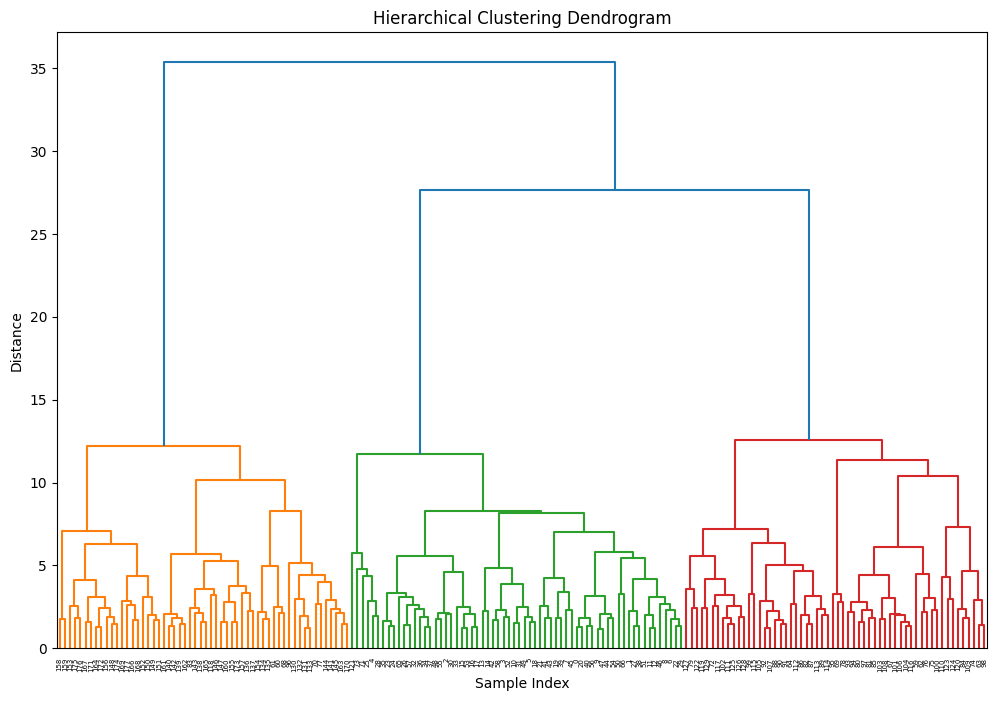

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Agglomerative Clustering

Fusiona recursivamente el par de conglomerados que aumenta mínimamente una determinada distancia de enlazamiento (linkage distance).

affinitycadena de caracteres o invocable, default=”euclidean”
Métrica utilizada para calcular el enlazamiento. Puede ser «euclidean», «l1», «l2», «manhattan», «cosine», o «precomputed». Si linkage es «ward», sólo se acepta «euclidean». Si es «precomputed», se necesita una matriz de distancias (en lugar de una matriz de similitud) como entrada para el método fit.

In [ ]:
# Hierarchical clustering with specified number of clusters
n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
wines['Cluster'] = hc.fit_predict(wines_norm)

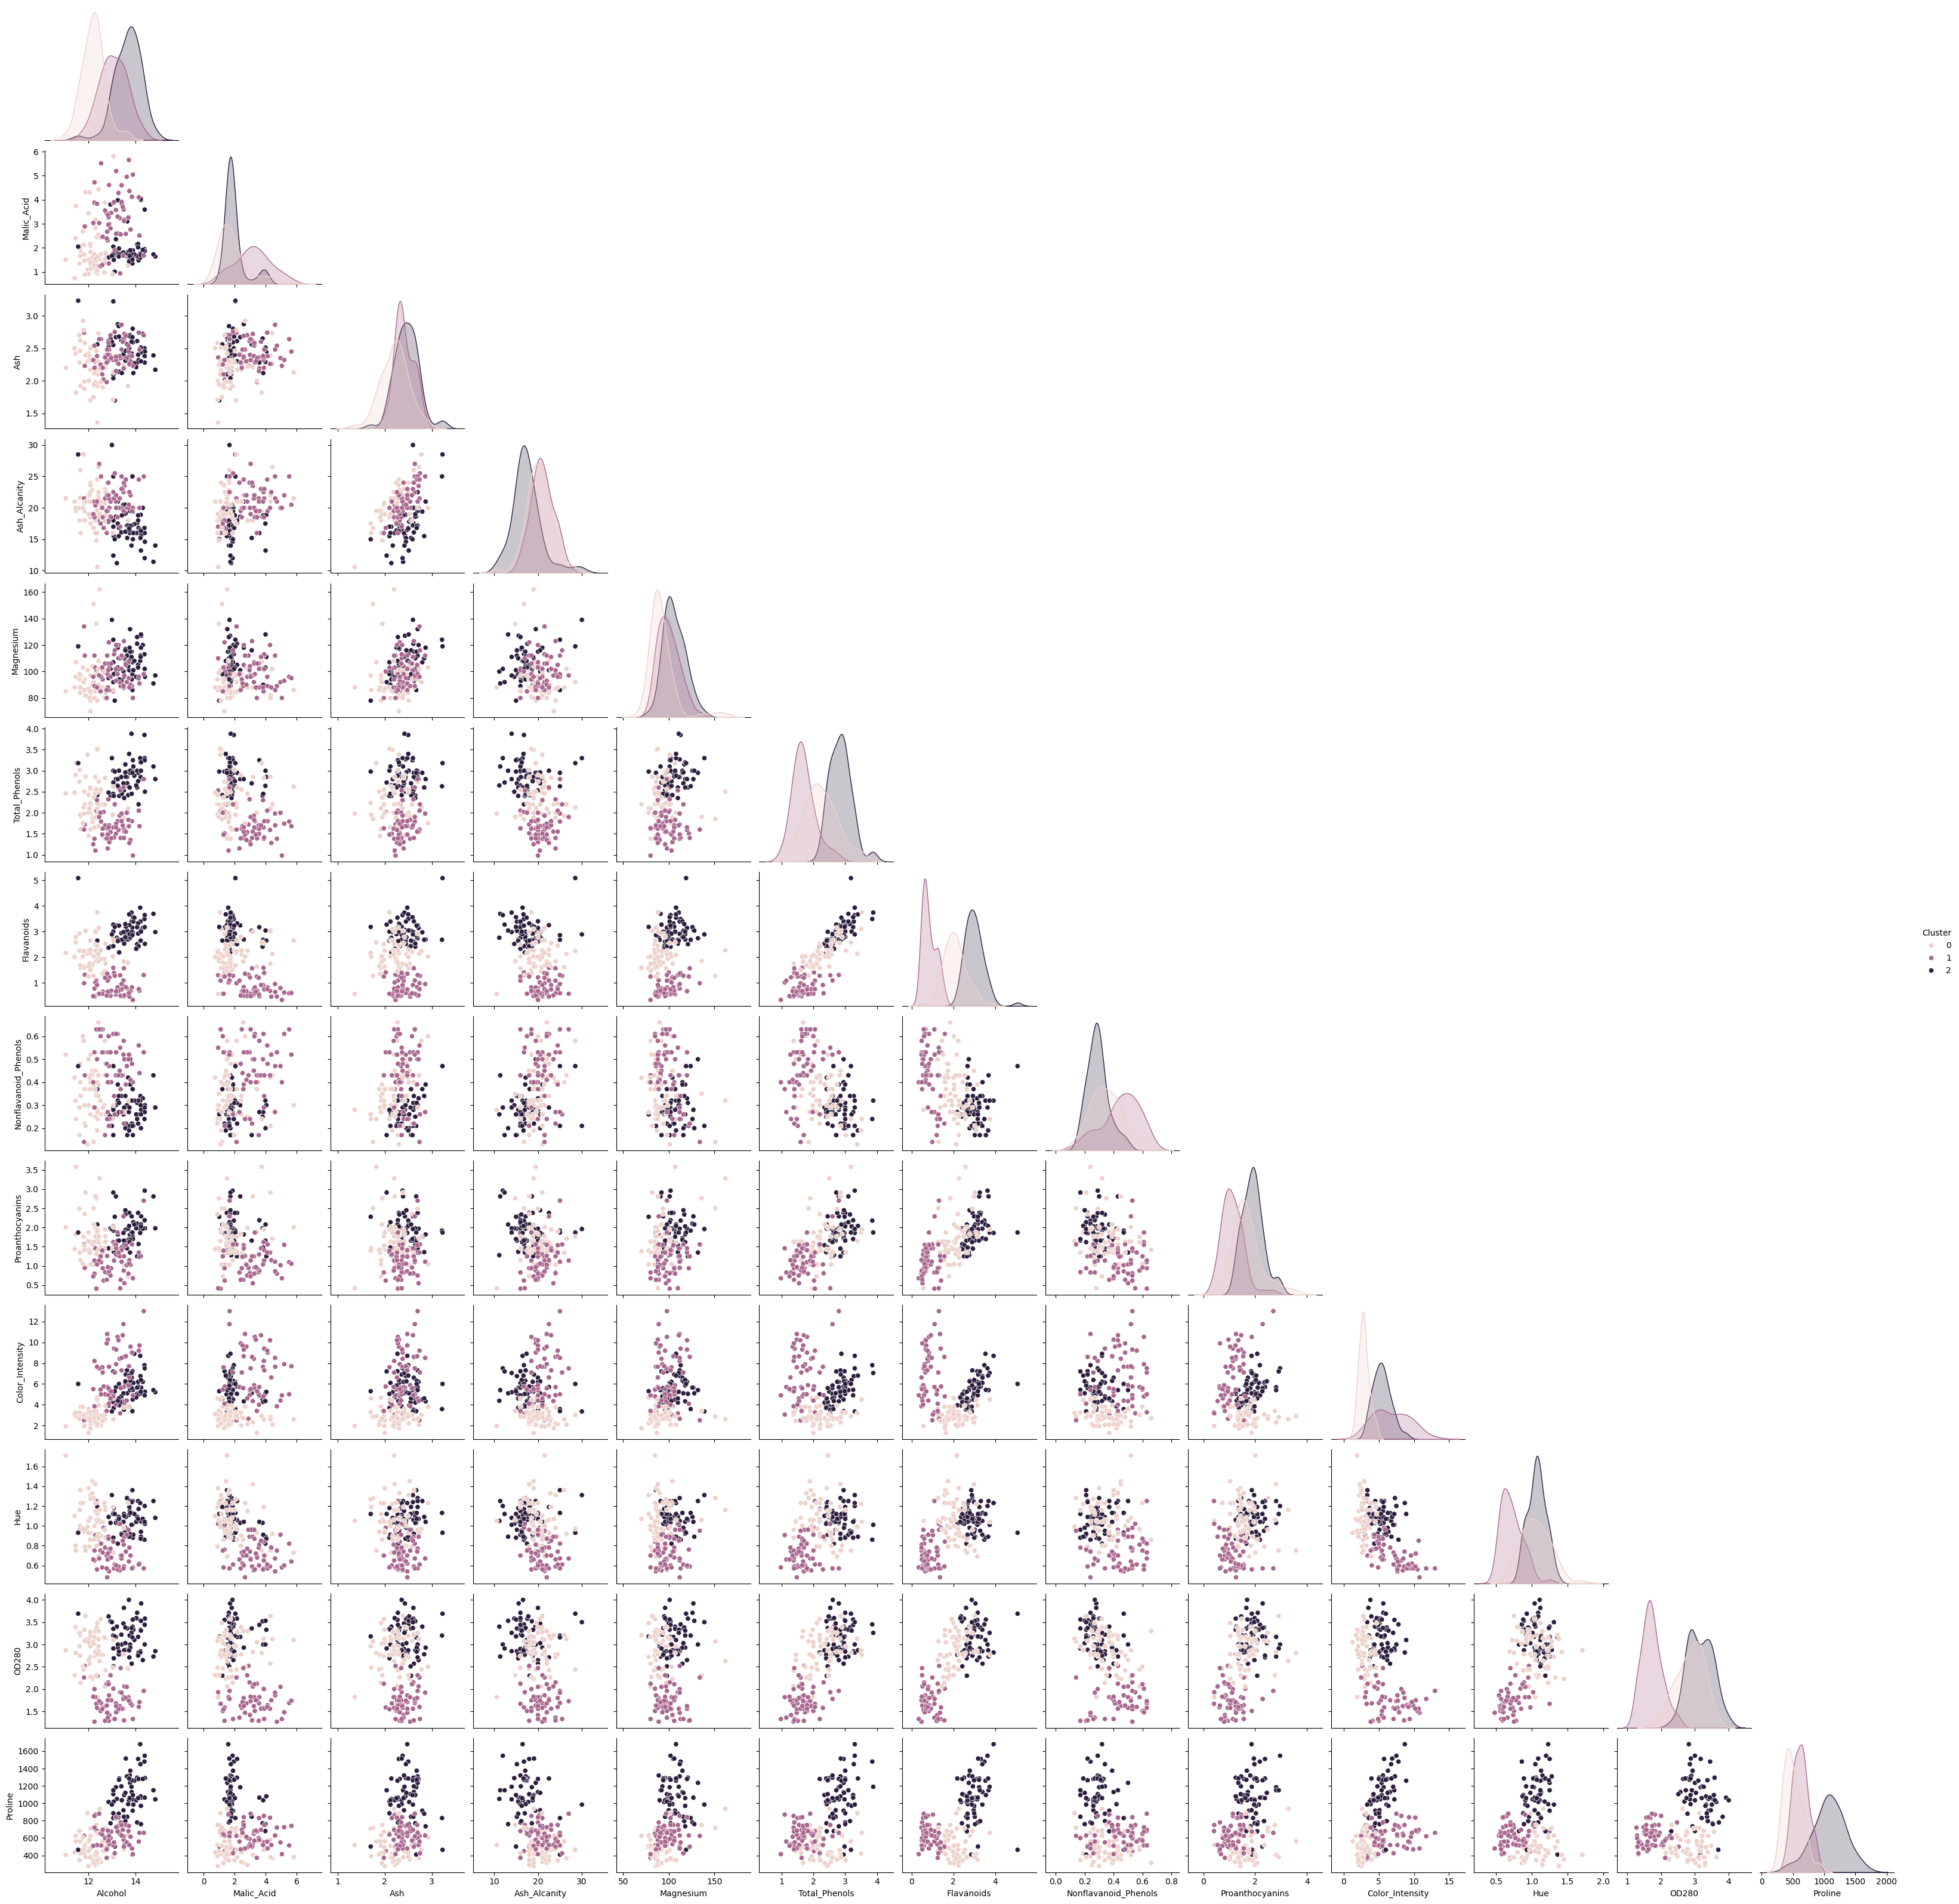

In [ ]:
# Visualize clustering results
sns.pairplot(wines, hue='Cluster', corner=True)
plt.show()